In [1]:
# importando as bibliotecas necessárias para rodar o script

# manipulação de números de ponto flutuante
import numpy as np

# plotagem de gráficos
import matplotlib.pyplot as plt

# criação manipulação de data frames
import pandas as pd

# funções matemáticas
import math

# criação dos modelos de DL
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM

# preprocessador - escalar os dados
from sklearn.preprocessing import MinMaxScaler

# metrica de desempenho (MSE)
from sklearn.metrics import mean_squared_error

c:\Users\gusta\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# definir um seed para reprodução dos experimentos
np.random.seed(42)

## Ativo 1 - Tesla

In [3]:
import yfinance as yf
import pandas as pd


# Baixar dados para um ativo específico
data = yf.download('TSLA', start='2010-01-01', end='2012-01-01')
data = data['Close'].values.reshape(-1, 1)



[*********************100%%**********************]  1 of 1 completed


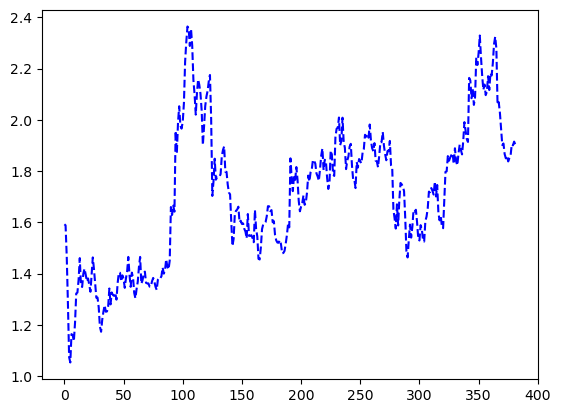

In [4]:
plt.plot(data, linestyle='--',  color='b')

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data = scaler.fit_transform(data)

print("* Dados escalados:")
print(data[:10].transpose())

* Dados escalados:
[[-0.17742698 -0.18352756 -0.37366533 -0.65429563 -0.96847949 -1.
  -0.83121463 -0.83731539 -0.87290198 -0.76207448]]


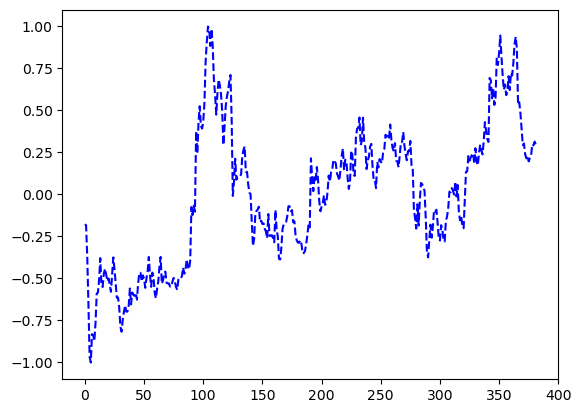

In [6]:
# visualizar nossos dados escalados
# Obs: prestar atenção ao eixo Y, agora varia entre [-1,+1]
plt.plot(data, linestyle='--', color='b')

In [7]:
# funcao auxiliar para criar os itervalos de previsao
# def create_dataset(dataset, janela_previsao=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset)-janela_previsao-1):
#         a = dataset[i:(i+janela_previsao), 0]
#         dataX.append(a)
#         dataY.append(dataset[i + janela_previsao, 0])
#     return np.array(dataX), np.array(dataY)

def create_dataset(dataset, janela_previsao=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-janela_previsao-1):
        a = dataset[i:(i+janela_previsao), 0]
        dataX.append(a)
        dataY.append(dataset[i + janela_previsao, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Ajustando conjunto de treino e teste
# 85% dos exemplos no treino, 15% no teste
train_size = int(len(data) * 0.70)
test_size  = len(data) - train_size

#print(train_size, test_size)
print("- Numero de instâncias treino: ", train_size)
print("- Numero de instâncias teste:   ", test_size)

- Numero de instâncias treino:  267
- Numero de instâncias teste:    115


In [9]:

train, test = data[0:train_size,:], data[train_size:len(data),:]

print("* Conjunto de Treinamento:", train.shape)
#print(train)

print("* Conjunto de Teste:", test.shape)
#print(test)

* Conjunto de Treinamento: (267, 1)
* Conjunto de Teste: (115, 1)


In [10]:
# reshape em X=t and Y=t+1
# isto é, criando dados no padrão DF = [X|Y]
# para cada X, o Y = X+1

janela_previsao = 1
trainX, trainY = create_dataset(train, janela_previsao)

# vendo o nosso conjunto de treinamento
print("DF = [X | X+1]")
np.column_stack((trainX, trainY))

DF = [X | X+1]


array([[-1.77426982e-01, -1.83527562e-01],
       [-1.83527562e-01, -3.73665328e-01],
       [-3.73665328e-01, -6.54295632e-01],
       [-6.54295632e-01, -9.68479489e-01],
       [-9.68479489e-01, -1.00000000e+00],
       [-1.00000000e+00, -8.31214627e-01],
       [-8.31214627e-01, -8.37315389e-01],
       [-8.37315389e-01, -8.72901983e-01],
       [-8.72901983e-01, -7.62074481e-01],
       [-7.62074481e-01, -5.89221388e-01],
       [-5.89221388e-01, -5.84138056e-01],
       [-5.84138056e-01, -5.07879719e-01],
       [-5.07879719e-01, -3.78748659e-01],
       [-3.78748659e-01, -5.42450701e-01],
       [-5.42450701e-01, -5.50584322e-01],
       [-5.50584322e-01, -4.71275876e-01],
       [-4.71275876e-01, -4.41789862e-01],
       [-4.41789862e-01, -4.76359208e-01],
       [-4.76359208e-01, -5.17030770e-01],
       [-5.17030770e-01, -4.99746097e-01],
       [-4.99746097e-01, -5.37365733e-01],
       [-5.37365733e-01, -5.79054725e-01],
       [-5.79054725e-01, -4.79409498e-01],
       [-4.

In [11]:
# reshape em X=t and Y=t+1 para o conjunto de teste

testX, testY  = create_dataset(test, janela_previsao)
print("Conjunto de Teste no formato supervisionado:")
print(testX)
print("Conjunto de Teste no formato supervisionado:")
print(testY)
print("\nDF = [X | X+1]")
np.column_stack((testX, testY))

Conjunto de Teste no formato supervisionado:
[[ 3.10625761e-01]
 [ 3.11641555e-01]
 [ 3.71632286e-01]
 [ 2.90289162e-01]
 [ 2.40468185e-01]
 [ 2.03864161e-01]
 [ 2.57752858e-01]
 [ 2.57752858e-01]
 [ 3.18759383e-01]
 [ 1.73360899e-01]
 [ 1.59125061e-01]
 [-8.99847331e-02]
 [-1.41840206e-01]
 [-2.02846913e-01]
 [-5.84640408e-02]
 [-1.84544810e-01]
 [-3.40615400e-02]
 [ 6.86323403e-02]
 [ 6.04987188e-02]
 [ 4.72801294e-02]
 [ 1.98271569e-02]
 [-1.39807165e-01]
 [-3.39094346e-01]
 [-3.74682576e-01]
 [-2.71987241e-01]
 [-1.79461478e-01]
 [-2.56735428e-01]
 [-1.93695862e-01]
 [-9.40522711e-02]
 [-1.02186074e-01]
 [-9.10019812e-02]
 [-1.66242889e-01]
 [-2.60803148e-01]
 [-2.74021737e-01]
 [-1.82511768e-01]
 [-2.05897203e-01]
 [-2.70971447e-01]
 [-2.80122317e-01]
 [-1.58109268e-01]
 [-1.31672089e-01]
 [-8.28667234e-02]
 [ 1.67768670e-02]
 [ 1.37265772e-02]
 [ 3.81290780e-02]
 [ 2.18601987e-02]
 [-5.07805902e-04]
 [ 7.57503500e-02]
 [-1.16933536e-02]
 [ 5.64311808e-02]
 [-1.06253612e-01]
 [-1.

array([[ 3.10625761e-01,  3.11641555e-01],
       [ 3.11641555e-01,  3.71632286e-01],
       [ 3.71632286e-01,  2.90289162e-01],
       [ 2.90289162e-01,  2.40468185e-01],
       [ 2.40468185e-01,  2.03864161e-01],
       [ 2.03864161e-01,  2.57752858e-01],
       [ 2.57752858e-01,  2.57752858e-01],
       [ 2.57752858e-01,  3.18759383e-01],
       [ 3.18759383e-01,  1.73360899e-01],
       [ 1.73360899e-01,  1.59125061e-01],
       [ 1.59125061e-01, -8.99847331e-02],
       [-8.99847331e-02, -1.41840206e-01],
       [-1.41840206e-01, -2.02846913e-01],
       [-2.02846913e-01, -5.84640408e-02],
       [-5.84640408e-02, -1.84544810e-01],
       [-1.84544810e-01, -3.40615400e-02],
       [-3.40615400e-02,  6.86323403e-02],
       [ 6.86323403e-02,  6.04987188e-02],
       [ 6.04987188e-02,  4.72801294e-02],
       [ 4.72801294e-02,  1.98271569e-02],
       [ 1.98271569e-02, -1.39807165e-01],
       [-1.39807165e-01, -3.39094346e-01],
       [-3.39094346e-01, -3.74682576e-01],
       [-3.

In [12]:
# Ajustando os conjunto de treino (trainX) e teste (testX) para o formato
# [samples, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
print("- Dim train:", trainX.shape)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("- Dim test:  ", testX.shape)

print("Teste no formato para input:") #alternativamente poderíamos ter amostras multivariadas
print(testX)

- Dim train: (265, 1, 1)
- Dim test:   (113, 1, 1)
Teste no formato para input:
[[[ 3.10625761e-01]]

 [[ 3.11641555e-01]]

 [[ 3.71632286e-01]]

 [[ 2.90289162e-01]]

 [[ 2.40468185e-01]]

 [[ 2.03864161e-01]]

 [[ 2.57752858e-01]]

 [[ 2.57752858e-01]]

 [[ 3.18759383e-01]]

 [[ 1.73360899e-01]]

 [[ 1.59125061e-01]]

 [[-8.99847331e-02]]

 [[-1.41840206e-01]]

 [[-2.02846913e-01]]

 [[-5.84640408e-02]]

 [[-1.84544810e-01]]

 [[-3.40615400e-02]]

 [[ 6.86323403e-02]]

 [[ 6.04987188e-02]]

 [[ 4.72801294e-02]]

 [[ 1.98271569e-02]]

 [[-1.39807165e-01]]

 [[-3.39094346e-01]]

 [[-3.74682576e-01]]

 [[-2.71987241e-01]]

 [[-1.79461478e-01]]

 [[-2.56735428e-01]]

 [[-1.93695862e-01]]

 [[-9.40522711e-02]]

 [[-1.02186074e-01]]

 [[-9.10019812e-02]]

 [[-1.66242889e-01]]

 [[-2.60803148e-01]]

 [[-2.74021737e-01]]

 [[-1.82511768e-01]]

 [[-2.05897203e-01]]

 [[-2.70971447e-01]]

 [[-2.80122317e-01]]

 [[-1.58109268e-01]]

 [[-1.31672089e-01]]

 [[-8.28667234e-02]]

 [[ 1.67768670e-02

In [13]:
# Criando nossa rede recorrente com unidades de LSTM

# formato keras sequencial
model = Sequential()

# camada recorrente com 4 blocos/neurônios, amostra única (1)
# para prever a janela de previsão = 1
# assim, input_shape = (1, 1)
model.add(LSTM(units=4, input_shape=(1, janela_previsao)))
# Add um layer, completamente conectado para agregar a saida dos 4 neuronios
model.add(Dense(1))

# visualizar o modelo (arquitetura) que geramos
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [14]:
# parâmetros para otimizacao
# medida a ser minimizada = Erro quadrático médio (Mean Squared Error)
# Otimizador, algoritmo de treinamento = Adam
# métricas para avaliar o modelo = MSE, RMSE, MAE
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"]
)

In [15]:
# Treinando nossa rede
# epocas = 20
# batch_size = 1, treinar amostra por amostra
history = model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
265/265 - 3s - loss: 0.0934 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.3057 - mean_absolute_error: 0.2532 - 3s/epoch - 13ms/step
Epoch 2/20
265/265 - 1s - loss: 0.0385 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1962 - mean_absolute_error: 0.1497 - 552ms/epoch - 2ms/step
Epoch 3/20
265/265 - 1s - loss: 0.0140 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1185 - mean_absolute_error: 0.0826 - 641ms/epoch - 2ms/step
Epoch 4/20
265/265 - 1s - loss: 0.0104 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1019 - mean_absolute_error: 0.0701 - 750ms/epoch - 3ms/step
Epoch 5/20
265/265 - 1s - loss: 0.0101 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004 - mean_absolute_error: 0.0700 - 799ms/epoch - 3ms/step
Epoch 6/20
265/265 - 1s - loss: 0.0101 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005 - mean_absolute_error: 0.0699 - 768ms/epoch - 3ms/step
Epoch 7/20
265/265 - 1s - loss: 0.0100 - mean_squared_error:

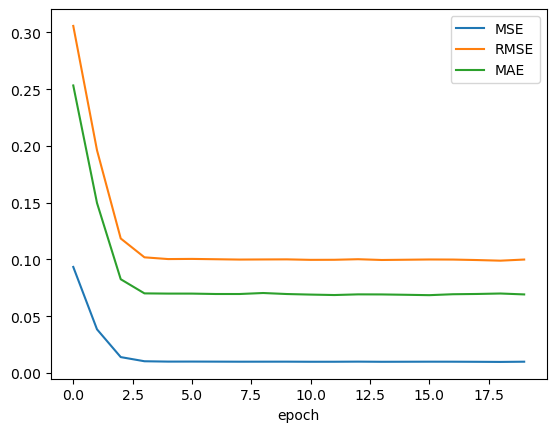

In [16]:
# Plotando os erros obtidos no conjunto de treinamento
# plotamos as três medidas (MSE, RMSE, MAE)
# percebam que depois de 20 épocas, não há uma redução significativa nos erros,
#e o treinamento poderia ser feito com uma quantidade menor de iterações

# checar os nomes
#print(history.history.keys())

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

In [17]:
# Realizando as predições nos conjuntos de treino/teste

# predição no conjunto de trienamento
trainPredict = model.predict(trainX)

# predição no conjunto de teste
testPredict  = model.predict(testX)

4/4 [==============================] - 0s 3ms/step


In [18]:
print("Predição do Teste:")
print(testPredict)

print("\nDF = [Real | Predito]")
np.column_stack((testY, testPredict))

Predição do Teste:
[[ 0.3127208 ]
 [ 0.31371   ]
 [ 0.37126303]
 [ 0.29281977]
 [ 0.24332985]
 [ 0.20636821]
 [ 0.2606125 ]
 [ 0.2606125 ]
 [ 0.3206282 ]
 [ 0.1752279 ]
 [ 0.16060068]
 [-0.10031112]
 [-0.15452157]
 [-0.21760094]
 [-0.06719054]
 [-0.19877489]
 [-0.04150087]
 [ 0.06652294]
 [ 0.05799654]
 [ 0.0441228 ]
 [ 0.01525695]
 [-0.15240483]
 [-0.3541407 ]
 [-0.38851017]
 [-0.28777507]
 [-0.19353002]
 [-0.27243745]
 [-0.20819943]
 [-0.10457765]
 [-0.11310314]
 [-0.10137832]
 [-0.17986108]
 [-0.27653652]
 [-0.2898144 ]
 [-0.19667803]
 [-0.22072937]
 [-0.2867563 ]
 [-0.29591975]
 [-0.17142971]
 [-0.14392693]
 [-0.09284025]
 [ 0.01204639]
 [ 0.00883534]
 [ 0.03450764]
 [ 0.01739651]
 [-0.00615444]
 [ 0.07397744]
 [-0.01793742]
 [ 0.05372951]
 [-0.11736321]
 [-0.16720748]
 [-0.13862301]
 [-0.20819943]
 [-0.21551433]
 [-0.03400471]
 [ 0.1354029 ]
 [ 0.1385606 ]
 [ 0.23106216]
 [ 0.20326738]
 [ 0.2228527 ]
 [ 0.23720276]
 [ 0.24842449]
 [ 0.18355916]
 [ 0.27777702]
 [ 0.19912772]
 [ 0.1

array([[ 3.11641555e-01,  3.12720805e-01],
       [ 3.71632286e-01,  3.13710004e-01],
       [ 2.90289162e-01,  3.71263027e-01],
       [ 2.40468185e-01,  2.92819768e-01],
       [ 2.03864161e-01,  2.43329853e-01],
       [ 2.57752858e-01,  2.06368208e-01],
       [ 2.57752858e-01,  2.60612488e-01],
       [ 3.18759383e-01,  2.60612488e-01],
       [ 1.73360899e-01,  3.20628196e-01],
       [ 1.59125061e-01,  1.75227895e-01],
       [-8.99847331e-02,  1.60600677e-01],
       [-1.41840206e-01, -1.00311123e-01],
       [-2.02846913e-01, -1.54521570e-01],
       [-5.84640408e-02, -2.17600942e-01],
       [-1.84544810e-01, -6.71905354e-02],
       [-3.40615400e-02, -1.98774889e-01],
       [ 6.86323403e-02, -4.15008701e-02],
       [ 6.04987188e-02,  6.65229410e-02],
       [ 4.72801294e-02,  5.79965375e-02],
       [ 1.98271569e-02,  4.41228040e-02],
       [-1.39807165e-01,  1.52569478e-02],
       [-3.39094346e-01, -1.52404830e-01],
       [-3.74682576e-01, -3.54140699e-01],
       [-2.

In [19]:
# Aplicando a inversa da escala para retornar ao valor original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [20]:
print("\n * Predição do Teste na escala original:")
print(testPredict.shape)
print(testPredict)

#print("\nDF = [Real | Predito]")
#np.column_stack((testY, testPredict))

print("\n * Predição do Teste na escala original:")
print(testY.shape)
print(testY)


 * Predição do Teste na escala original:
(113, 1)
[[1.9140407]
 [1.9146893]
 [1.952425 ]
 [1.9009923]
 [1.8685434]
 [1.8443089]
 [1.8798751]
 [1.8798751]
 [1.9192253]
 [1.8238912]
 [1.8143007]
 [1.6432292]
 [1.6076853]
 [1.5663263]
 [1.6649454]
 [1.5786698]
 [1.6817892]
 [1.7526169]
 [1.7470264]
 [1.7379298]
 [1.7190034]
 [1.6090732]
 [1.4768016]
 [1.4542668]
 [1.5203153]
 [1.5821087]
 [1.5303718]
 [1.5724906]
 [1.6404319]
 [1.634842 ]
 [1.6425296]
 [1.5910709]
 [1.5276841]
 [1.5189782]
 [1.5800447]
 [1.5642749]
 [1.5209833]
 [1.5149752]
 [1.5965991]
 [1.6146318]
 [1.6481277]
 [1.7168984]
 [1.7147931]
 [1.7316254]
 [1.7204063]
 [1.7049648]
 [1.7575045]
 [1.697239 ]
 [1.7442286]
 [1.6320488]
 [1.5993676]
 [1.6181093]
 [1.5724906]
 [1.5676944]
 [1.6867042]
 [1.7977791]
 [1.7998496]
 [1.8604997]
 [1.8422757]
 [1.8551172]
 [1.864526 ]
 [1.8718836]
 [1.8293536]
 [1.8911293]
 [1.8395615]
 [1.8238912]
 [1.8705485]
 [1.9049191]
 [1.8851808]
 [1.8672045]
 [1.918578 ]
 [1.9883488]
 [1.9574512]


In [21]:
# Calculando RMSE no treino e teste
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Treino: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Teste Score: %.2f RMSE' % (testScore))

Treino: 0.06 RMSE
Teste Score: 0.06 RMSE


In [22]:
# Ajustando o plot do treino
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict
print(trainPredictPlot)

[[       nan]
 [1.58348632]
 [1.57935762]
 [1.45490515]
 [1.2936126 ]
 [1.15323782]
 [1.1415242 ]
 [1.20920181]
 [1.20653975]
 [1.19133878]
 [1.24052751]
 [1.32814538]
 [1.33091998]
 [1.37384319]
 [1.45171809]
 [1.3540858 ]
 [1.34950876]
 [1.39528346]
 [1.41293037]
 [1.39227474]
 [1.36856616]
 [1.37856174]
 [1.35696137]
 [1.33370543]
 [1.39047408]
 [1.45426679]
 [1.41108966]
 [1.36274207]
 [1.31443691]
 [1.31498015]
 [1.28475153]
 [1.22922802]
 [1.21547711]
 [1.24917686]
 [1.27196038]
 [1.29099286]
 [1.27145457]
 [1.27246678]
 [1.28838372]
 [1.34439218]
 [1.2936126 ]
 [1.33147645]
 [1.32317829]
 [1.32043397]
 [1.32980895]
 [1.30849409]
 [1.36274207]
 [1.39890766]
 [1.39830232]
 [1.36798167]
 [1.38927495]
 [1.37797105]
 [1.34666216]
 [1.37856174]
 [1.40254593]
 [1.45618236]
 [1.3916738 ]
 [1.35007966]
 [1.39890766]
 [1.38152504]
 [1.32980895]
 [1.31281066]
 [1.3426944 ]
 [1.36739826]
 [1.41970932]
 [1.45618236]
 [1.360425  ]
 [1.37149334]
 [1.39468062]
 [1.40254593]
 [1.36332297]
 [1.36

In [23]:
# Ajustando o plot do teste
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(data)-1, :] = testPredict
print(testPredictPlot)

[[       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [    

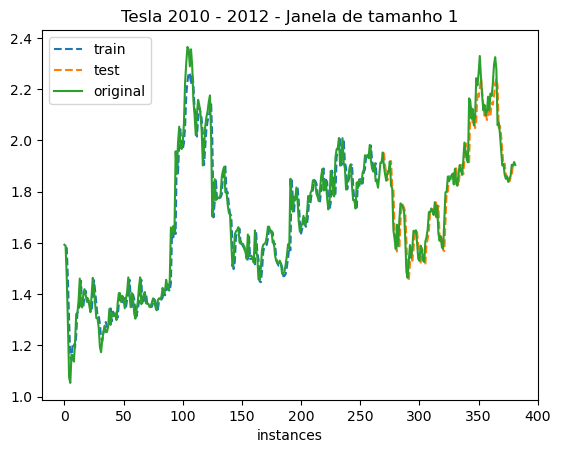

In [24]:
# Ajustando o plot com o sinal original
# - verde   = dataset original
# - azul    = predicoes geradas no conjunto de treinamento
# - laranja = predicoes geradas no conjunto de teste

plt.plot(trainPredictPlot,  linestyle="--")
plt.plot(testPredictPlot,  linestyle="--")
plt.plot(scaler.inverse_transform(data))
plt.xlabel('instances')
plt.legend(['train', 'test', 'original'], loc='upper left')
plt.title("Tesla 2010 - 2012 - Janela de tamanho " + str(janela_previsao))
plt.show()

## Ativo 2 - PepsiCo

[*********************100%%**********************]  1 of 1 completed


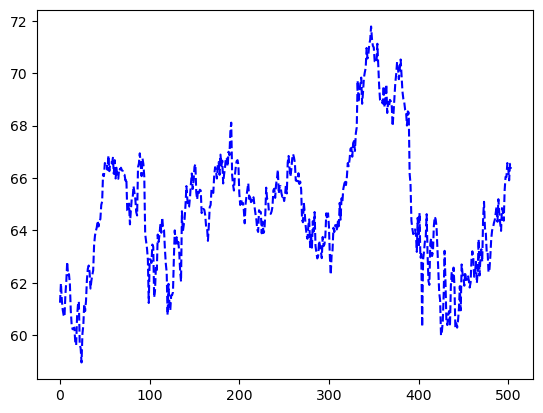

In [25]:
# Baixar dados para um ativo específico
data = yf.download('PEP', start='2010-01-01', end='2012-01-01')
data = data['Close'].values.reshape(-1, 1)

plt.plot(data, linestyle='--',  color='b')

In [26]:
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.70)
test_size  = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

trainX, trainY = create_dataset(train, janela_previsao)
np.column_stack((trainX, trainY))
testX, testY  = create_dataset(test, janela_previsao)
np.column_stack((testX, testY))

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(units=4, input_shape=(1, janela_previsao)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"]
)
history = model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)



Epoch 1/20
350/350 - 4s - loss: 0.0681 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2609 - mean_absolute_error: 0.1913 - 4s/epoch - 10ms/step
Epoch 2/20
350/350 - 1s - loss: 0.0310 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1760 - mean_absolute_error: 0.1280 - 1s/epoch - 3ms/step
Epoch 3/20
350/350 - 1s - loss: 0.0121 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1101 - mean_absolute_error: 0.0798 - 933ms/epoch - 3ms/step
Epoch 4/20
350/350 - 1s - loss: 0.0094 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968 - mean_absolute_error: 0.0721 - 957ms/epoch - 3ms/step
Epoch 5/20
350/350 - 1s - loss: 0.0089 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0944 - mean_absolute_error: 0.0703 - 855ms/epoch - 2ms/step
Epoch 6/20
350/350 - 1s - loss: 0.0088 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938 - mean_absolute_error: 0.0701 - 961ms/epoch - 3ms/step
Epoch 7/20
350/350 - 1s - loss: 0.0085 - mean_squared_error: 0.

KeyboardInterrupt: 

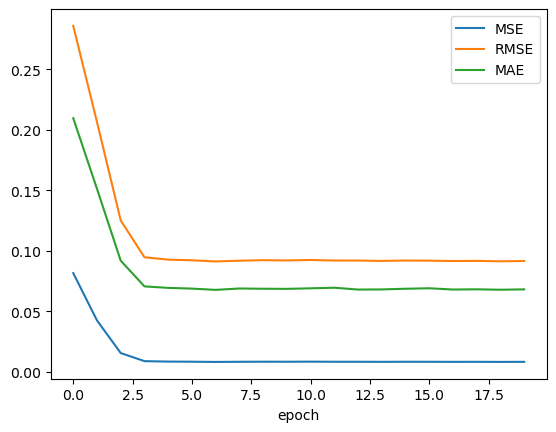

In [ ]:

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()


5/5 [==============================] - 0s 774us/step


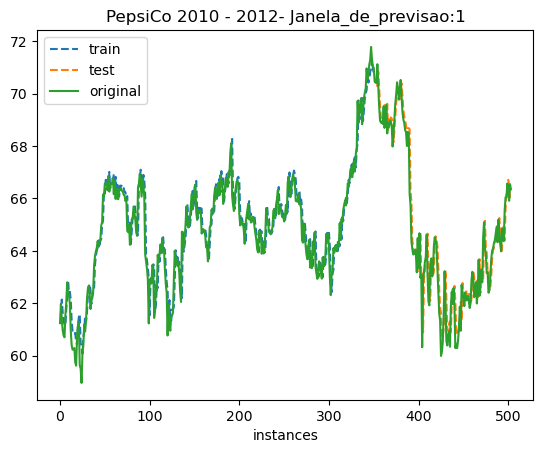

In [ ]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
np.column_stack((testY, testPredict))

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(data)-1, :] = testPredict

plt.plot(trainPredictPlot,  linestyle="--")
plt.plot(testPredictPlot,  linestyle="--")
plt.plot(scaler.inverse_transform(data))
plt.xlabel('instances')
plt.legend(['train', 'test', 'original'], loc='upper left')
plt.title("PepsiCo 2010 - 2012- Janela_de_previsao:" + str(janela_previsao))
plt.show()


## Ativo 3 - Walmart

[*********************100%%**********************]  1 of 1 completed


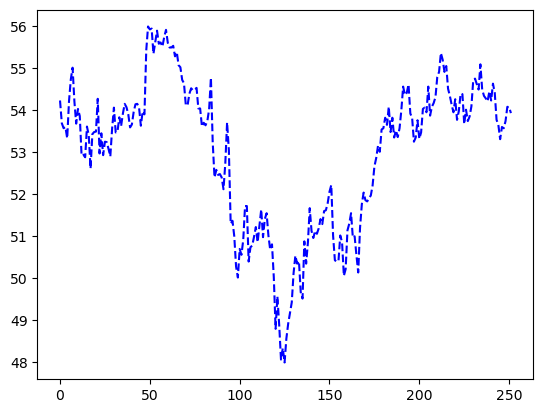

In [ ]:
# Baixar dados para um ativo específico
data = yf.download('WMT', start='2010-01-01', end='2011-01-01')
data = data['Close'].values.reshape(-1, 1)

plt.plot(data, linestyle='--',  color='b')

In [ ]:
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.70)
test_size  = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

trainX, trainY = create_dataset(train, janela_previsao)
np.column_stack((trainX, trainY))
testX, testY  = create_dataset(test, janela_previsao)
np.column_stack((testX, testY))

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(units=4, input_shape=(1, janela_previsao)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"]
)
history = model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)



Epoch 1/20
174/174 - 3s - loss: 0.2756 - mean_squared_error: 0.2756 - root_mean_squared_error: 0.5249 - mean_absolute_error: 0.4500 - 3s/epoch - 16ms/step
Epoch 2/20
174/174 - 0s - loss: 0.2225 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4717 - mean_absolute_error: 0.4073 - 253ms/epoch - 1ms/step
Epoch 3/20
174/174 - 0s - loss: 0.1674 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.4091 - mean_absolute_error: 0.3500 - 340ms/epoch - 2ms/step
Epoch 4/20
174/174 - 0s - loss: 0.1110 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3331 - mean_absolute_error: 0.2772 - 359ms/epoch - 2ms/step
Epoch 5/20
174/174 - 0s - loss: 0.0649 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2547 - mean_absolute_error: 0.2014 - 266ms/epoch - 2ms/step
Epoch 6/20
174/174 - 0s - loss: 0.0375 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1936 - mean_absolute_error: 0.1442 - 384ms/epoch - 2ms/step
Epoch 7/20
174/174 - 0s - loss: 0.0259 - mean_squared_error:

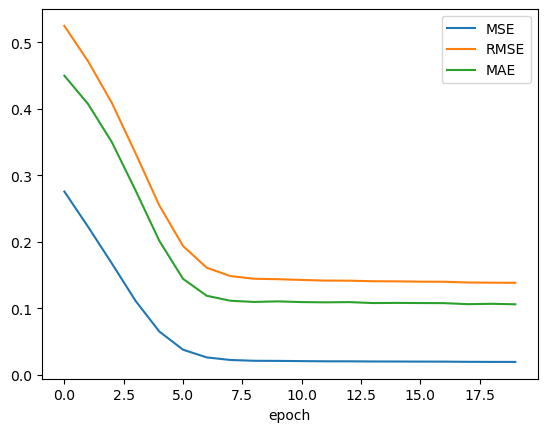

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

3/3 [==============================] - 0s 4ms/step


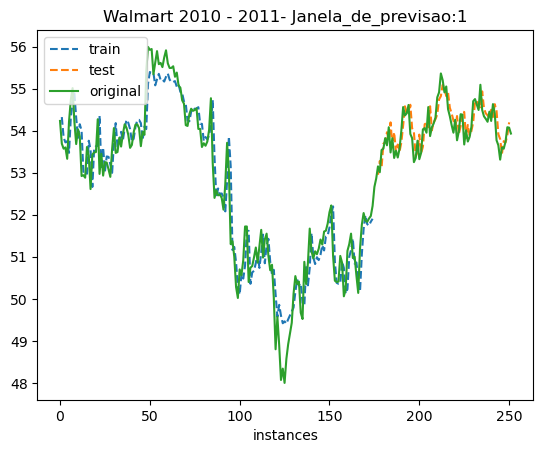

In [ ]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
np.column_stack((testY, testPredict))

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(data)-1, :] = testPredict

plt.plot(trainPredictPlot,  linestyle="--")
plt.plot(testPredictPlot,  linestyle="--")
plt.plot(scaler.inverse_transform(data))
plt.xlabel('instances')
plt.legend(['train', 'test', 'original'], loc='upper left')
plt.title("Walmart 2010 - 2011- Janela_de_previsao:" + str(janela_previsao))
plt.show()


## Ativo 4 - ADOBE

[*********************100%%**********************]  1 of 1 completed


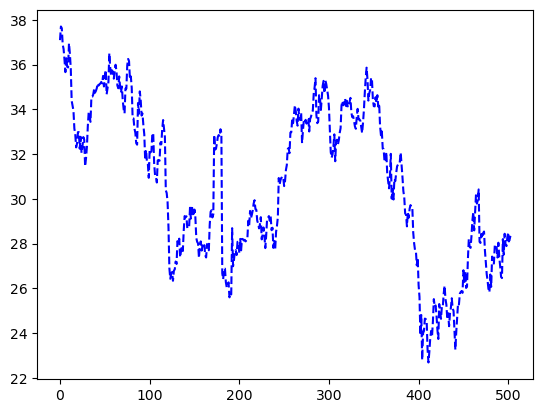

In [ ]:
# Baixar dados para um ativo específico
data = yf.download('ADBE', start='2010-01-01', end='2012-01-01')
data = data['Close'].values.reshape(-1, 1)

plt.plot(data, linestyle='--',  color='b')

In [ ]:
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.70)
test_size  = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

trainX, trainY = create_dataset(train, janela_previsao)
np.column_stack((trainX, trainY))
testX, testY  = create_dataset(test, janela_previsao)
np.column_stack((testX, testY))

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(units=4, input_shape=(1, janela_previsao)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"]
)
history = model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)



Epoch 1/20
350/350 - 4s - loss: 0.0939 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.3064 - mean_absolute_error: 0.2650 - 4s/epoch - 11ms/step
Epoch 2/20
350/350 - 1s - loss: 0.0237 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1538 - mean_absolute_error: 0.1170 - 1s/epoch - 3ms/step
Epoch 3/20
350/350 - 1s - loss: 0.0087 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0935 - mean_absolute_error: 0.0631 - 1s/epoch - 3ms/step
Epoch 4/20
350/350 - 1s - loss: 0.0084 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914 - mean_absolute_error: 0.0593 - 1s/epoch - 3ms/step
Epoch 5/20
350/350 - 1s - loss: 0.0084 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916 - mean_absolute_error: 0.0590 - 1s/epoch - 3ms/step
Epoch 6/20
350/350 - 1s - loss: 0.0084 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916 - mean_absolute_error: 0.0589 - 1s/epoch - 3ms/step
Epoch 7/20
350/350 - 1s - loss: 0.0083 - mean_squared_error: 0.0083 - root_

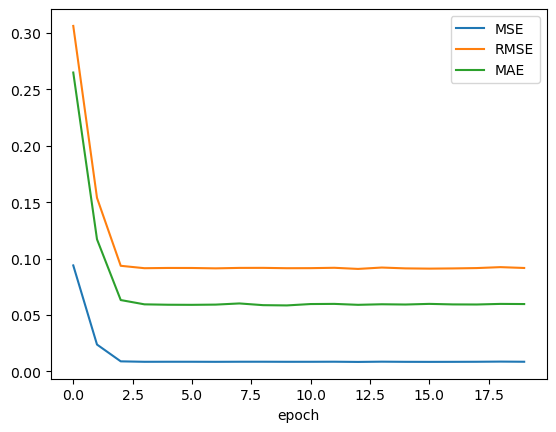

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()


5/5 [==============================] - 0s 0s/step


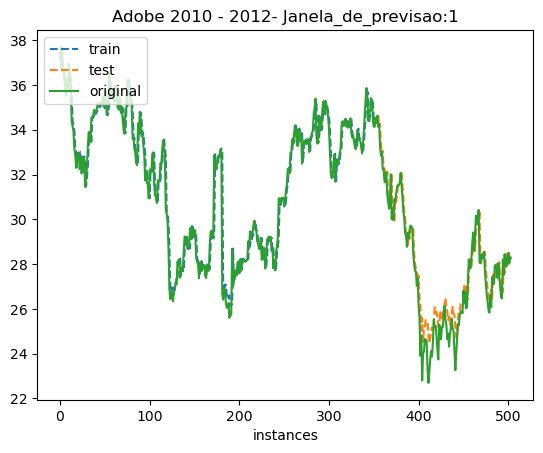

In [ ]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
np.column_stack((testY, testPredict))

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(data)-1, :] = testPredict

plt.plot(trainPredictPlot,  linestyle="--")
plt.plot(testPredictPlot,  linestyle="--")
plt.plot(scaler.inverse_transform(data))
plt.xlabel('instances')
plt.legend(['train', 'test', 'original'], loc='upper left')
plt.title("Adobe 2010 - 2012- Janela_de_previsao:" + str(janela_previsao))
plt.show()
